In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df= pd.read_excel(r"C:\Users\oyedeepak\Downloads\Assignment\Forecasting\Airlines+Data.xlsx", index_col= 'Month', parse_dates= True)
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [3]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [4]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [5]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


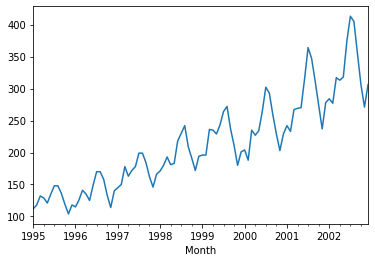

In [6]:
df['Passengers'].plot()


In [7]:
### Simple Exponential Smoothing ###

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha= 2/(span+1)

df['EWMA12']= df['Passengers'].ewm(alpha= alpha, adjust= False).mean()

In [8]:
    model_ses12=SimpleExpSmoothing(df['Passengers'])
    fitted_model= model_ses12.fit(smoothing_level=alpha,optimized=False)
    df['SES12'] = fitted_model.fittedvalues.shift(-1)
    df.head()

,Passengers,EWMA12,SES12
Month,,,
1995-01-01,112,112.000000,112.000000
1995-02-01,118,112.923077,112.923077
1995-03-01,132,115.857988,115.857988
1995-04-01,129,117.879836,117.879836
1995-05-01,121,118.359861,118.359861


In [9]:
### Double Exponential Smoothing ###

from statsmodels.tsa.holtwinters import ExponentialSmoothing

mod_add12= ExponentialSmoothing(df['Passengers'], trend = 'add')
fitted_model= mod_add12.fit()
df['DESadd12']= fitted_model.fittedvalues.shift(-1)
df.head()

,Passengers,EWMA12,SES12,DESadd12
Month,,,,
1995-01-01,112,112.000000,112.000000,114.04213
1995-02-01,118,112.923077,112.923077,120.04213
1995-03-01,132,115.857988,115.857988,134.04213
1995-04-01,129,117.879836,117.879836,131.04213
1995-05-01,121,118.359861,118.359861,123.04213


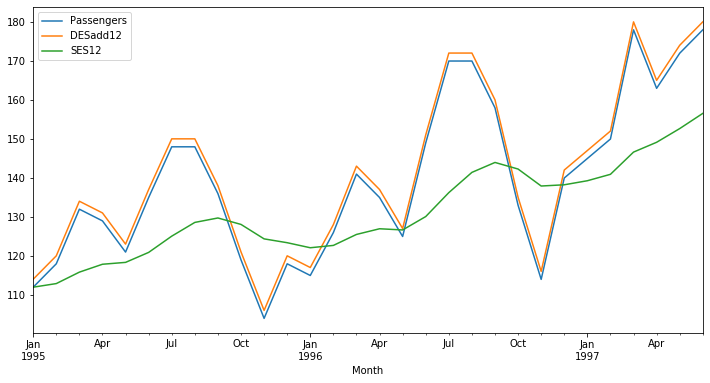

In [10]:
df[['Passengers','DESadd12','SES12']].iloc[:30].plot(figsize=(12,6)).autoscale(axis='x', tight= True)

In [11]:
df['DESmul12']= ExponentialSmoothing(df['Passengers'], trend= 'mul').fit().fittedvalues.shift(-1)
df.head()

,Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1995-01-01,112,112.000000,112.000000,114.04213,112.343358
1995-02-01,118,112.923077,112.923077,120.04213,118.361753
1995-03-01,132,115.857988,115.857988,134.04213,132.404672
1995-04-01,129,117.879836,117.879836,131.04213,129.395475
1995-05-01,121,118.359861,118.359861,123.04213,121.370950


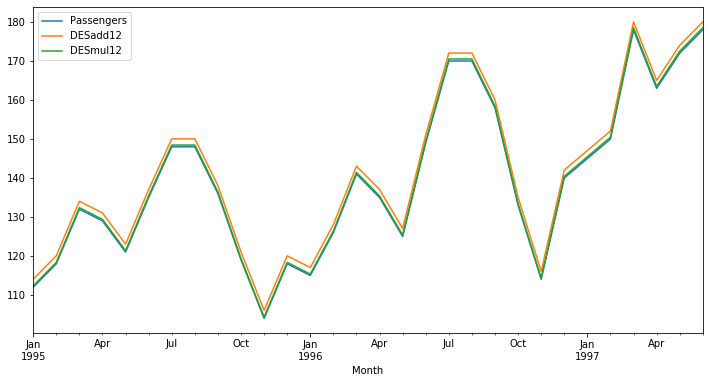

In [12]:
df[['Passengers','DESadd12','DESmul12']].iloc[:30].plot(figsize=(12,6)).autoscale(axis='x', tight= True)

In [13]:
### Triple Exponential Smoothing ###

df['TESadd12'] = ExponentialSmoothing(df['Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\oyedeepak\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1995-01-01,112,112.000000,112.000000,114.04213,112.343358,113.112576
1995-02-01,118,112.923077,112.923077,120.04213,118.361753,120.484249
1995-03-01,132,115.857988,115.857988,134.04213,132.404672,135.402337
1995-04-01,129,117.879836,117.879836,131.04213,129.395475,132.997233
1995-05-01,121,118.359861,118.359861,123.04213,121.370950,125.458905


In [14]:
### Triple Exponential Smoothing ###

df['TESmul12'] = ExponentialSmoothing(df['Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1995-01-01,112,112.000000,112.000000,114.04213,112.343358,113.112576,113.653096
1995-02-01,118,112.923077,112.923077,120.04213,118.361753,120.484249,111.329090
1995-03-01,132,115.857988,115.857988,134.04213,132.404672,135.402337,134.359769
1995-04-01,129,117.879836,117.879836,131.04213,129.395475,132.997233,129.669009
1995-05-01,121,118.359861,118.359861,123.04213,121.370950,125.458905,129.739189


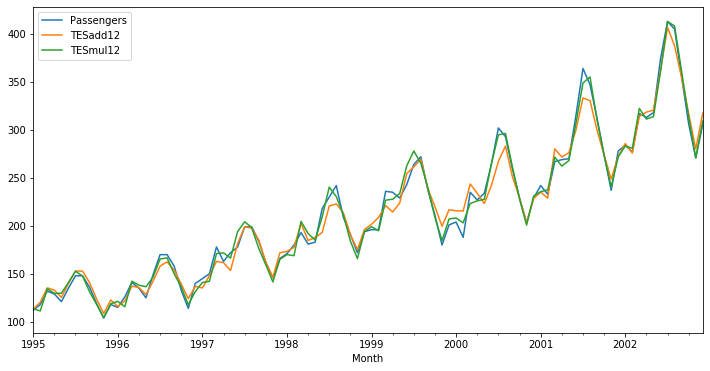

In [26]:
df[['Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

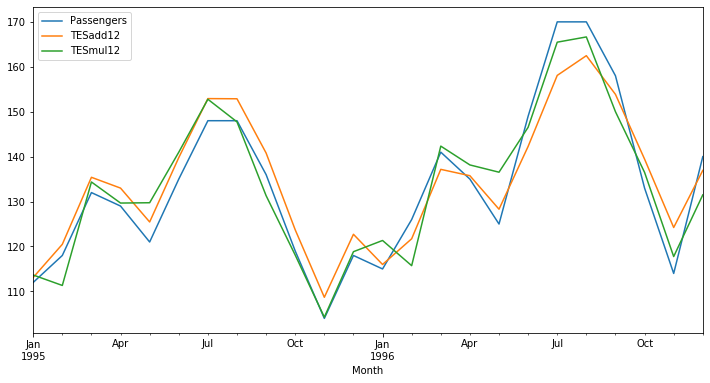

In [16]:
df[['Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [18]:
df.tail()

,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
2002-08-01,405,335.501047,335.501047,407.04213,406.241609,387.506691,408.199937
2002-09-01,355,338.500886,338.500886,357.04213,356.088324,354.331524,360.418672
2002-10-01,306,333.500749,333.500749,308.04213,306.938104,316.778865,313.036477
2002-11-01,271,323.885249,323.885249,273.04213,271.830805,280.222051,270.663083
2002-12-01,306,321.133673,NaN,NaN,NaN,317.503979,309.309514


In [19]:
df_mod = df.drop(df.tail(1).index,inplace=False) # drop last 1 rows
df_mod.tail()

,Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
2002-07-01,413,322.864873,322.864873,415.04213,414.266134,406.690900,412.994909
2002-08-01,405,335.501047,335.501047,407.04213,406.241609,387.506691,408.199937
2002-09-01,355,338.500886,338.500886,357.04213,356.088324,354.331524,360.418672
2002-10-01,306,333.500749,333.500749,308.04213,306.938104,316.778865,313.036477
2002-11-01,271,323.885249,323.885249,273.04213,271.830805,280.222051,270.663083


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
r_ewma = np.sqrt(mean_squared_error(df_mod['Passengers'], df_mod['EWMA12']))
r_ses = np.sqrt(mean_squared_error(df_mod['Passengers'], df_mod['SES12']))
r_desadd = np.sqrt(mean_squared_error(df_mod['Passengers'], df_mod['DESadd12']))
r_desmul = np.sqrt(mean_squared_error(df_mod['Passengers'], df_mod['DESmul12']))
r_tesadd = np.sqrt(mean_squared_error(df_mod['Passengers'], df_mod['TESadd12']))
r_tesmul = np.sqrt(mean_squared_error(df_mod['Passengers'], df_mod['TESmul12']))

In [22]:
r_df = [['EWMA12', r_ewma], ['SES12', r_ses], ['DESadd12', r_desadd], ['DESmul12', r_desmul], ['TESadd12', r_tesadd], ['TESmul12', r_tesmul]]

In [23]:
RMSE  = pd.DataFrame(r_df, columns = ['Model', 'RMSE']) 


In [24]:
RMSE

,Model,RMSE
0,EWMA12,28.782204
1,SES12,28.782204
2,DESadd12,2.042130
3,DESmul12,0.687829
4,TESadd12,10.354104
5,TESmul12,6.760385


In [27]:
#So, from the above data, we can see that DESmul12 has least RMSE. Thus, DESmul12 is a very good model compared to others!